In [443]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import numpy as np


sns.plotting_context("talk")

produit = pd.read_csv("./data/products.csv")
client = pd.read_csv("./data/customers.csv")
vente = pd.read_csv("./data/transactions.csv")


vente = vente.drop(vente[vente.id_prod == 'T_0'].index)
vente['date'] = pd.to_datetime(vente['date'], format='%Y-%m-%d')


# Vérification des tables

# Produit

In [444]:
print(produit.head(5))

  id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0


In [445]:
print(produit.shape)
print(produit.describe(include='all'))

(3287, 3)
       id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000


'id_prod' est bel et bien une clé primaire, car ils sont tous uniques.

# Client

In [446]:
print(client.head(5))

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943


In [447]:
print(client.shape)
print(client.describe(include='all'))

(8623, 3)
       client_id   sex        birth
count       8623  8623  8623.000000
unique      8623     2          NaN
top       c_4410     f          NaN
freq           1  4491          NaN
mean         NaN   NaN  1978.280877
std          NaN   NaN    16.919535
min          NaN   NaN  1929.000000
25%          NaN   NaN  1966.000000
50%          NaN   NaN  1979.000000
75%          NaN   NaN  1992.000000
max          NaN   NaN  2004.000000


De même pour 'client_id'

# Vente

In [448]:
print(vente.head(5))

  id_prod                       date session_id client_id
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232


In [449]:
print(vente.describe(include='all'))

C:\Users\thebe\AppData\Local\Temp\ipykernel_18452\4137422567.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(vente.describe(include='all'))


       id_prod                        date session_id client_id
count   679332                      679332     679332    679332
unique    3266                      679332     342315      8600
top      1_369  2022-05-20 13:21:29.043970   s_118668    c_1609
freq      2252                           1         14     25488
first      NaN  2021-03-01 00:01:07.843138        NaN       NaN
last       NaN  2023-02-28 23:58:30.792755        NaN       NaN


# Fusion des Tables

In [450]:
tableTotale = pd.merge(vente, produit, on='id_prod', how='left')
tableTotale = pd.merge(tableTotale, client, on='client_id', how='left')

On retire les lignes de test

In [451]:
tableTotale = tableTotale.drop(tableTotale[tableTotale.id_prod == 'T_0'].index)

# Ajout de nouvelles catégories

Création d'une tranche d'age

In [452]:
def arrondiDizaine(n):
    while n%10 !=0:
        n=n-1
    return n

In [453]:
tableTotale['age'] = pd.DatetimeIndex(tableTotale['date']).year - tableTotale['birth']

In [454]:
tableTotale['trancheAge'] = tableTotale['age'].apply(arrondiDizaine)

tableTotale.loc[tableTotale["trancheAge"] >= 100, "trancheAge"] = "100+"
tableTotale.loc[tableTotale["trancheAge"] == 10, "trancheAge"] = "10-20"
tableTotale.loc[tableTotale["trancheAge"] == 20, "trancheAge"] = "20-30"
tableTotale.loc[tableTotale["trancheAge"] == 30, "trancheAge"] = "30-40"
tableTotale.loc[tableTotale["trancheAge"] == 40, "trancheAge"] = "40-50"
tableTotale.loc[tableTotale["trancheAge"] == 50, "trancheAge"] = "50-60"
tableTotale.loc[tableTotale["trancheAge"] == 60, "trancheAge"] = "60-70"
tableTotale.loc[tableTotale["trancheAge"] == 70, "trancheAge"] = "70-80"
tableTotale.loc[tableTotale["trancheAge"] == 80, "trancheAge"] = "80-90"
tableTotale.loc[tableTotale["trancheAge"] == 90, "trancheAge"] = "90-100"


In [455]:
print(tableTotale.describe(include='all', datetime_is_numeric=True))

       id_prod                           date session_id client_id  \
count   679332                         679332     679332    679332   
unique    3266                            NaN     342315      8600   
top      1_369                            NaN   s_118668    c_1609   
freq      2252                            NaN         14     25488   
mean       NaN  2022-03-03 15:13:19.307389696        NaN       NaN   
min        NaN     2021-03-01 00:01:07.843138        NaN       NaN   
25%        NaN  2021-09-08 09:14:25.055994368        NaN       NaN   
50%        NaN  2022-03-03 07:50:20.817730560        NaN       NaN   
75%        NaN  2022-08-30 23:57:08.555173888        NaN       NaN   
max        NaN     2023-02-28 23:58:30.792755        NaN       NaN   
std        NaN                            NaN        NaN       NaN   

                price          categ     sex          birth            age  \
count   679111.000000  679111.000000  679332  679332.000000  679332.000000   
uni

In [456]:
print(tableTotale.sample(5))

       id_prod                       date session_id client_id  price  categ  \
609590  0_1181 2022-08-25 07:29:55.586517   s_258158    c_6847  11.99    0.0   
330722  0_1460 2022-11-12 23:20:17.906544   s_296671    c_1378   4.59    0.0   
408324   1_392 2022-05-19 13:40:40.180103   s_210974    c_4182  18.11    1.0   
10011    0_993 2022-09-05 12:08:43.131807   s_263619    c_4357  10.99    0.0   
223286  0_1699 2021-05-08 02:59:16.632430    s_31444    c_5590  17.99    0.0   

       sex  birth  age trancheAge  
609590   f   1978   44      40-50  
330722   f   1983   39      30-40  
408324   m   1989   33      30-40  
10011    m   1975   47      40-50  
223286   m   1984   37      30-40  


In [457]:
print(tableTotale.describe(include='all', datetime_is_numeric=True))

       id_prod                           date session_id client_id  \
count   679332                         679332     679332    679332   
unique    3266                            NaN     342315      8600   
top      1_369                            NaN   s_118668    c_1609   
freq      2252                            NaN         14     25488   
mean       NaN  2022-03-03 15:13:19.307389696        NaN       NaN   
min        NaN     2021-03-01 00:01:07.843138        NaN       NaN   
25%        NaN  2021-09-08 09:14:25.055994368        NaN       NaN   
50%        NaN  2022-03-03 07:50:20.817730560        NaN       NaN   
75%        NaN  2022-08-30 23:57:08.555173888        NaN       NaN   
max        NaN     2023-02-28 23:58:30.792755        NaN       NaN   
std        NaN                            NaN        NaN       NaN   

                price          categ     sex          birth            age  \
count   679111.000000  679111.000000  679332  679332.000000  679332.000000   
uni

# Calcul du chiffre d'affaire

<AxesSubplot:xlabel='date', ylabel='semestre'>

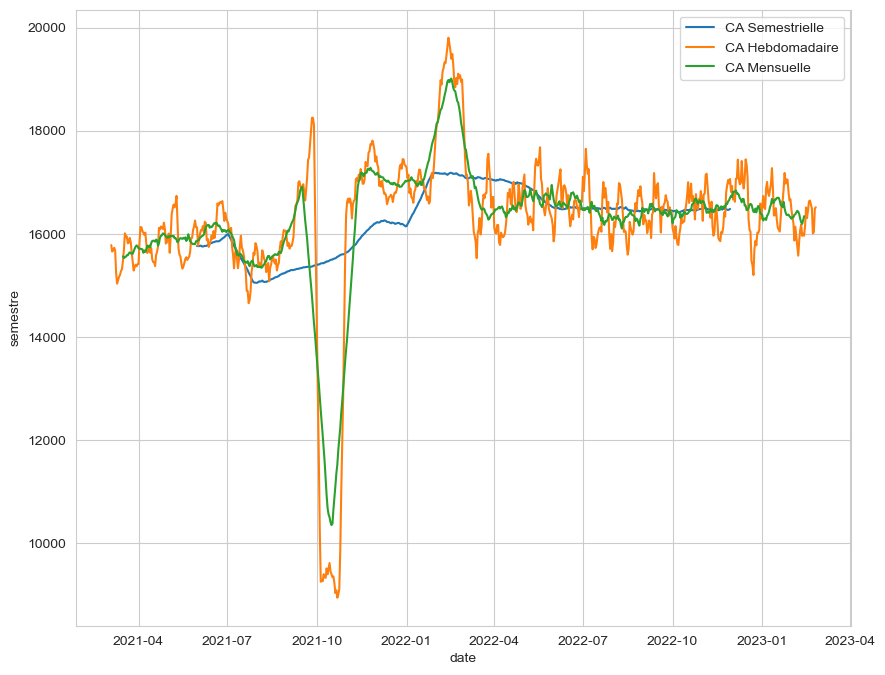

In [458]:
chiffreAffaire = tableTotale[['price', 'date', 'id_prod', 'categ']].sort_values(by='date')
plt.figure(figsize=(10, 8))

chiffreAffaireJournalier = tableTotale[['price', 'date']].resample('D', on='date').sum()

chiffreAffaireJournalier['jour'] = chiffreAffaireJournalier['price'].rolling(1).mean().shift(0)
chiffreAffaireJournalier['semaine'] = chiffreAffaireJournalier['price'].rolling(7).mean().shift(-3)
chiffreAffaireJournalier['mois'] = chiffreAffaireJournalier['price'].rolling(31).mean().shift(-15)
chiffreAffaireJournalier['semestre'] = chiffreAffaireJournalier['price'].rolling(183).mean().shift(-91)

"""
sns.lineplot(x="date",y="price",
             label="CA Journalier", data=chiffreAffaireJournalier,
             ci=None)
"""
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="semestre",
             label="CA Semestrielle",
             data=chiffreAffaireJournalier,
             ci=None)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="semaine",
             label="CA Hebdomadaire",
             data=chiffreAffaireJournalier,
             ci=None)

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="mois",
             label="CA Mensuelle",
             data=chiffreAffaireJournalier,
             ci=None)

# Nombre de Ventes par catégorie

<AxesSubplot:xlabel='date', ylabel='Count'>

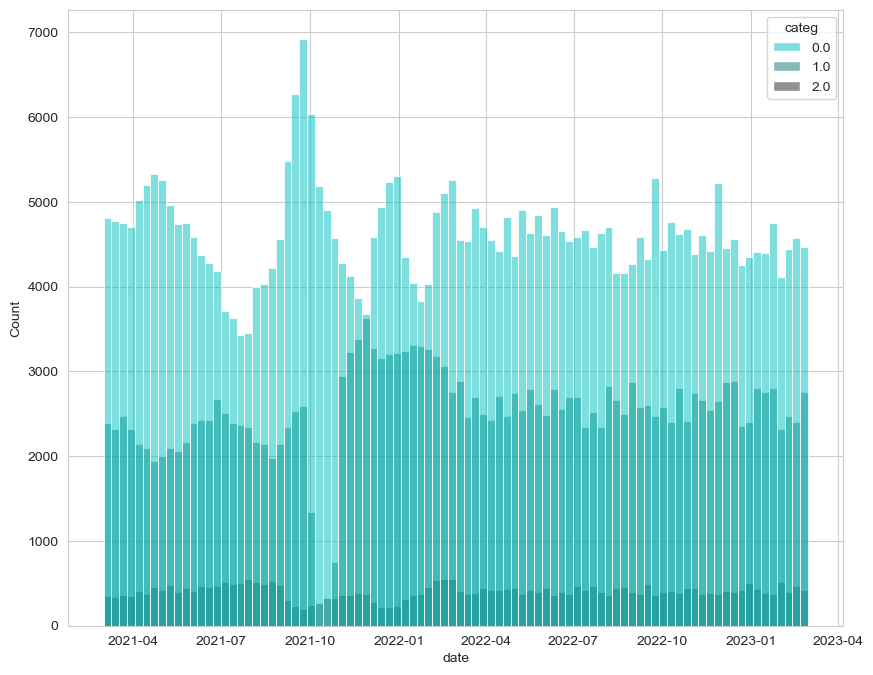

In [459]:
plt.figure(figsize=(10,8))
sns.histplot(data=tableTotale, x='date', hue='categ',palette="dark:c_r")



Comme on peut le voir, il manque certaines données sur le mois d'octobre. On va donc complétement effacer les données du mois d'octobre 2021.

In [460]:
tableTotale = tableTotale.drop(tableTotale[(tableTotale['date']>='2021-10-01') & (tableTotale['date']<='2021-10-31')].index)

# Nouveau chiffre d'affaires

<AxesSubplot:xlabel='date', ylabel='semestre'>

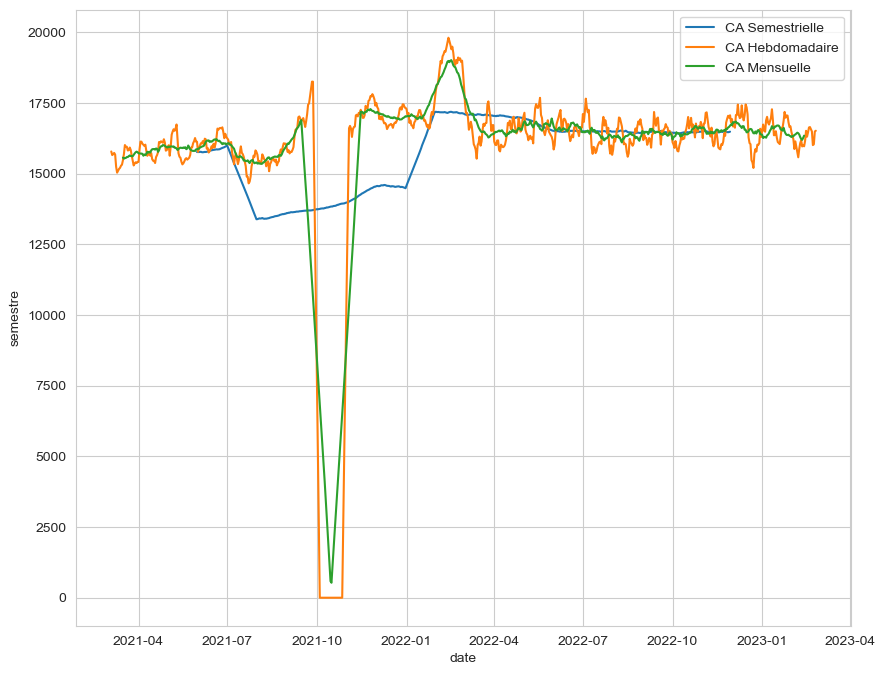

In [461]:
chiffreAffaire = tableTotale[['price', 'date', 'id_prod', 'categ']].sort_values(by='date')
plt.figure(figsize=(10, 8))

chiffreAffaireJournalier = tableTotale[['price', 'date']].resample('D', on='date').sum()

chiffreAffaireJournalier['jour'] = chiffreAffaireJournalier['price'].rolling(1).mean().shift(0)
chiffreAffaireJournalier['semaine'] = chiffreAffaireJournalier['price'].rolling(7).mean().shift(-3)
chiffreAffaireJournalier['mois'] = chiffreAffaireJournalier['price'].rolling(31).mean().shift(-15)
chiffreAffaireJournalier['semestre'] = chiffreAffaireJournalier['price'].rolling(183).mean().shift(-91)

"""
sns.lineplot(x="date",y="price",
             label="CA Journalier", data=chiffreAffaireJournalier,
             ci=None)
"""
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="semestre",
             label="CA Semestrielle",
             data=chiffreAffaireJournalier,
             ci=None)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="semaine",
             label="CA Hebdomadaire",
             data=chiffreAffaireJournalier,
             ci=None)

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date", y="mois",
             label="CA Mensuelle",
             data=chiffreAffaireJournalier,
             ci=None)

# Nouvelles ventes par catégorie

<AxesSubplot:xlabel='date', ylabel='Count'>

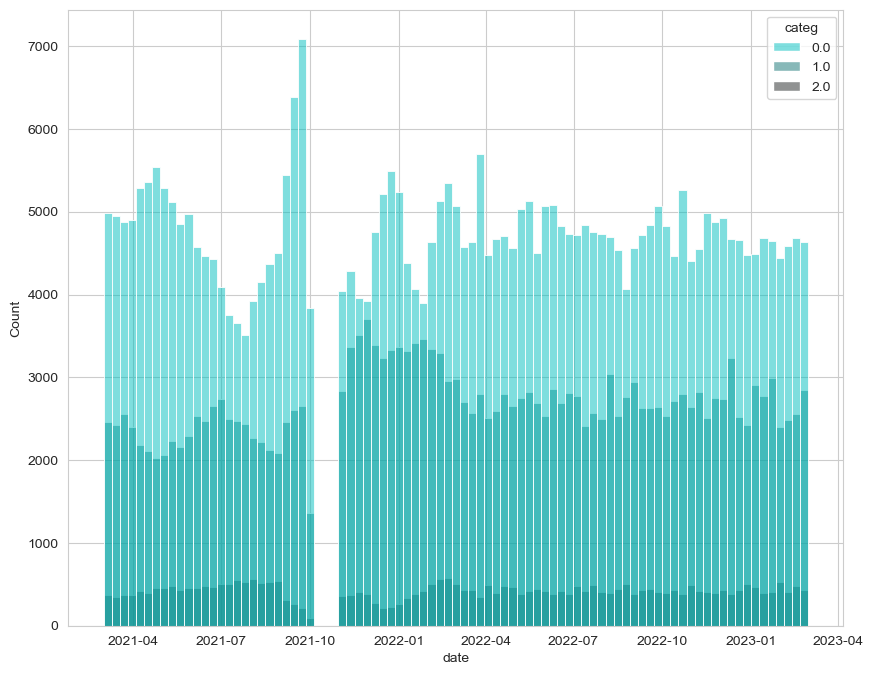

In [462]:
plt.figure(figsize=(10,8))
sns.histplot(data=tableTotale, x='date', hue='categ',palette="dark:c_r")

# Ajout de la fréquence d'achat

Ajout du nombre d'achats moyen par mois

In [463]:
max,min = tableTotale['date'].max(),tableTotale['date'].min()

nbMois = (max - min)/np.timedelta64(1, 'M')
nbMois = round(nbMois)

print("Les données s'étalent sur", nbMois,"mois,",nbMois-1, "si on ne prend pas en compte le mois d'octobre")

Les données s'étalent sur 24 mois, 23 si on ne prend pas en compte le mois d'octobre


On ajoute la fréquence d'achat en ignorant le mois d'octobre

In [464]:
tableTotale = tableTotale.merge(
    tableTotale.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'nombre d\'achats'}),
    how='left', on='client_id')
tableTotale['ventes_mensuelles'] = round(tableTotale['nombre d\'achats'] / (nbMois-1),2)
print(tableTotale.describe())
print(tableTotale.sort_values(by='price'))



               price          categ          birth            age  \
count  658450.000000  658450.000000  658664.000000  658664.000000   
mean       17.540185       0.450377    1977.776888      43.914655   
std        18.338788       0.595752      13.615401      13.629234   
min         0.620000       0.000000    1929.000000      17.000000   
25%         8.990000       0.000000    1970.000000      35.000000   
50%        13.990000       0.000000    1980.000000      42.000000   
75%        19.080000       1.000000    1987.000000      51.000000   
max       300.000000       2.000000    2004.000000      94.000000   

       nombre d'achats  ventes_mensuelles  
count    658664.000000      658664.000000  
mean       1260.498063          54.804453  
std        4739.587313         206.069663  
min           1.000000           0.040000  
25%          63.000000           2.740000  
50%         119.000000           5.170000  
75%         216.000000           9.390000  
max       24494.000000    

(Importance des plus grosses fréquences d'achats)

# Calcul du nouveau chiffre d'affaire

In [465]:
chiffreAffaire = tableTotale[['price', 'date', 'id_prod', 'categ']].sort_values(by='date')

<AxesSubplot:xlabel='date', ylabel='semestre'>

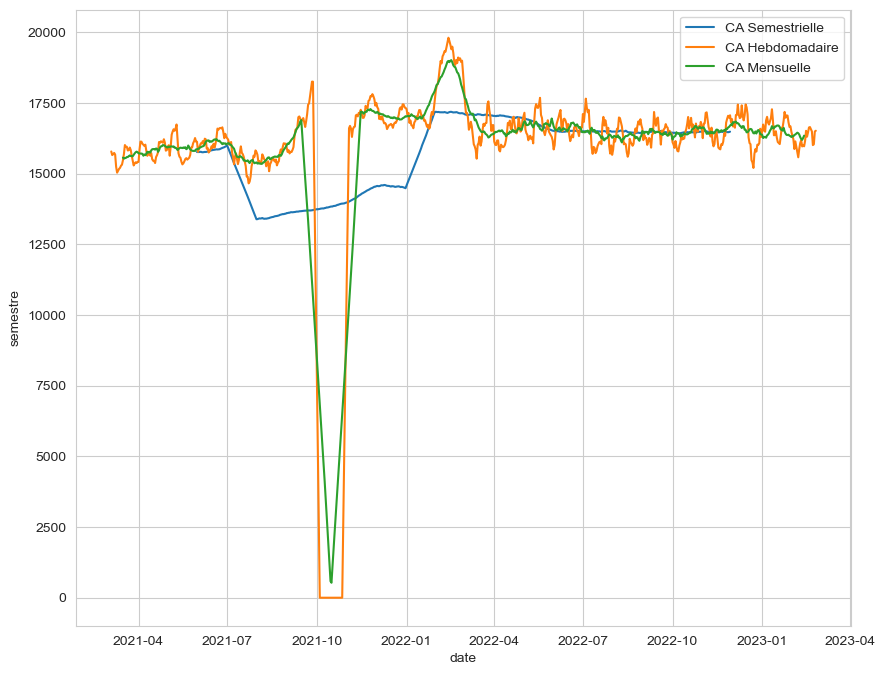

In [466]:
plt.figure(figsize=(10,8))

chiffreAffaireJournalier = chiffreAffaire[['price', 'date']].resample('D', on='date').sum()

chiffreAffaireJournalier['jour'] = chiffreAffaireJournalier['price'].rolling(1).mean().shift(0)
chiffreAffaireJournalier['semaine'] = chiffreAffaireJournalier['price'].rolling(7).mean().shift(-3)
chiffreAffaireJournalier['mois'] = chiffreAffaireJournalier['price'].rolling(31).mean().shift(-15)
chiffreAffaireJournalier['semestre'] = chiffreAffaireJournalier['price'].rolling(183).mean().shift(-91)

"""
sns.lineplot(x="date",y="price",
             label="CA Journalier", data=chiffreAffaireJournalier,
             ci=None)
"""
# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="semestre",
             label="CA Semestrielle",
             data=chiffreAffaireJournalier,
             ci=None)

# 7-day rolling average Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="semaine",
             label="CA Hebdomadaire",
             data=chiffreAffaireJournalier,
             ci=None)

# Time series plot with Seaborn lineplot() with label
sns.lineplot(x="date",y="mois",
             label="CA Mensuelle",
             data=chiffreAffaireJournalier,
             ci=None)


# Chiffre d'affaire par produit

<AxesSubplot:ylabel='id_prod'>

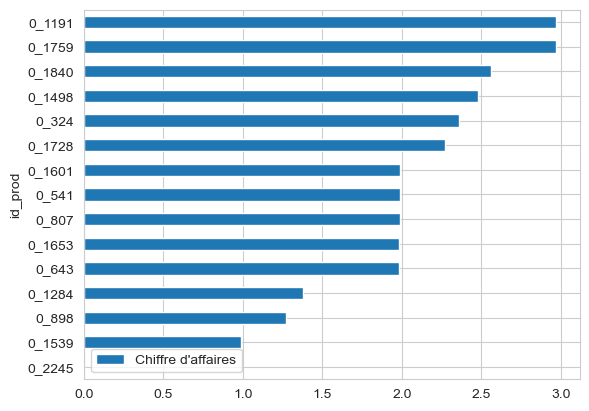

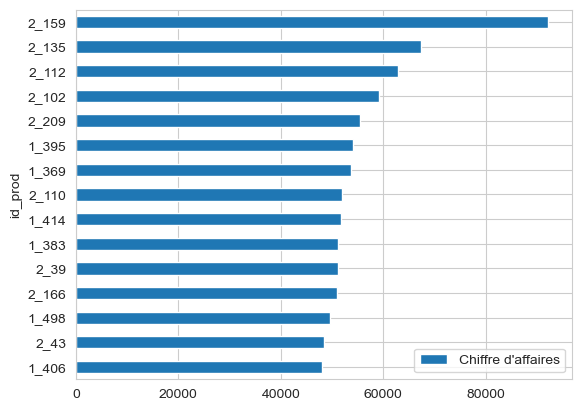

In [467]:
# ----------------------------------------------------------------------------------------------------------------------
# Chiffre d'affaire par produit/catégorie ------------------------------------------------------------------------------

# chiffreAffaireProduit = chiffreAffaire.groupby(['id_prod'],
# pd.Grouper(key='date', axis=0, freq='M')).sum().rename(columns={"price": "Chiffre d'affaires"})

chiffreAffaireProduit = chiffreAffaire.copy(deep=True)
chiffreAffaireProduit.set_index('date')
chiffreAffaireProduit.index = pd.to_datetime(chiffreAffaireProduit.index)
chiffreAffaireProduit = chiffreAffaireProduit.groupby('id_prod').sum().sort_values(by='price').rename(columns={"price": "Chiffre d'affaires"})

chiffreAffaireProduit.head(15)[['Chiffre d\'affaires']].plot.barh()
chiffreAffaireProduit.tail(15)[['Chiffre d\'affaires']].plot.barh()

# Chiffre d'affaire par catégorie

In [468]:
chiffreAffaire

,price,date,id_prod,categ
465922,11.99,2021-03-01 00:01:07.843138,0_1259,0.0
415305,19.37,2021-03-01 00:02:26.047414,0_1390,0.0
448495,4.50,2021-03-01 00:02:38.311413,0_1352,0.0
473326,6.55,2021-03-01 00:04:54.559692,0_1458,0.0
425598,16.49,2021-03-01 00:05:18.801198,0_1358,0.0
...,...,...,...,...
178921,21.92,2023-02-28 23:49:03.148402,1_508,1.0
570119,48.99,2023-02-28 23:51:29.318531,2_37,2.0
126126,26.99,2023-02-28 23:53:18.929676,1_695,1.0
533562,8.99,2023-02-28 23:58:00.107815,0_1547,0.0


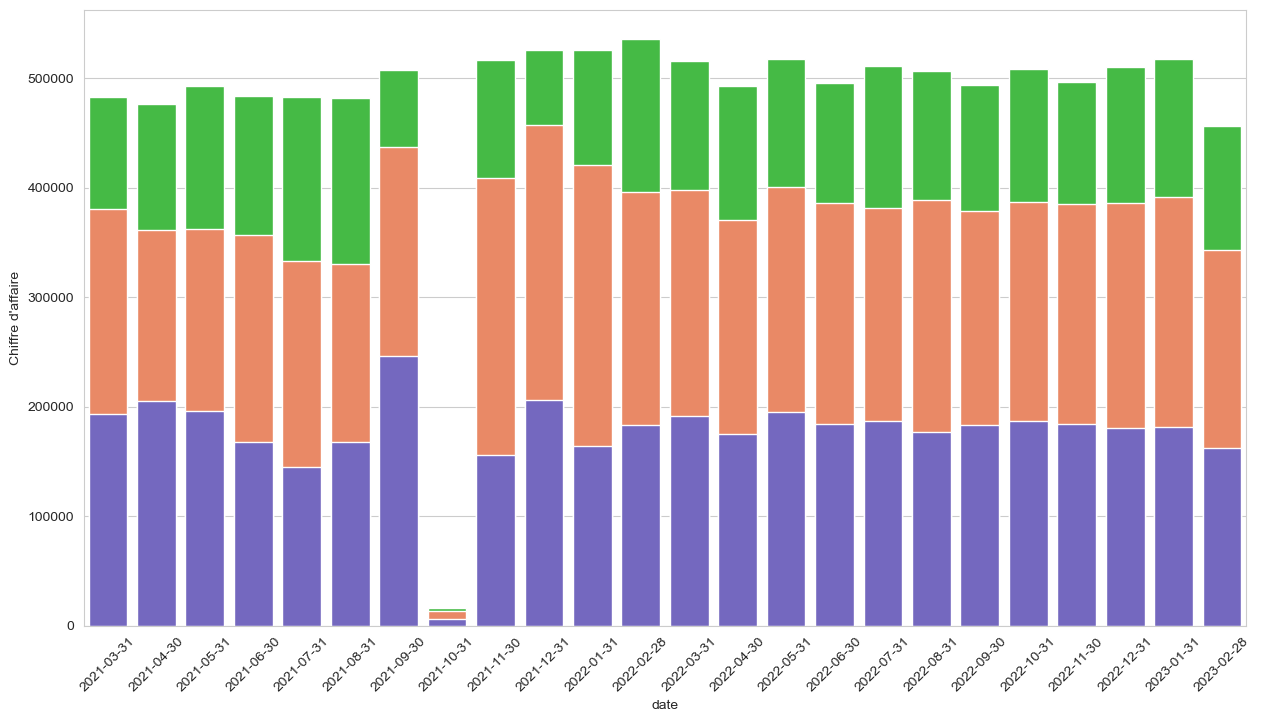

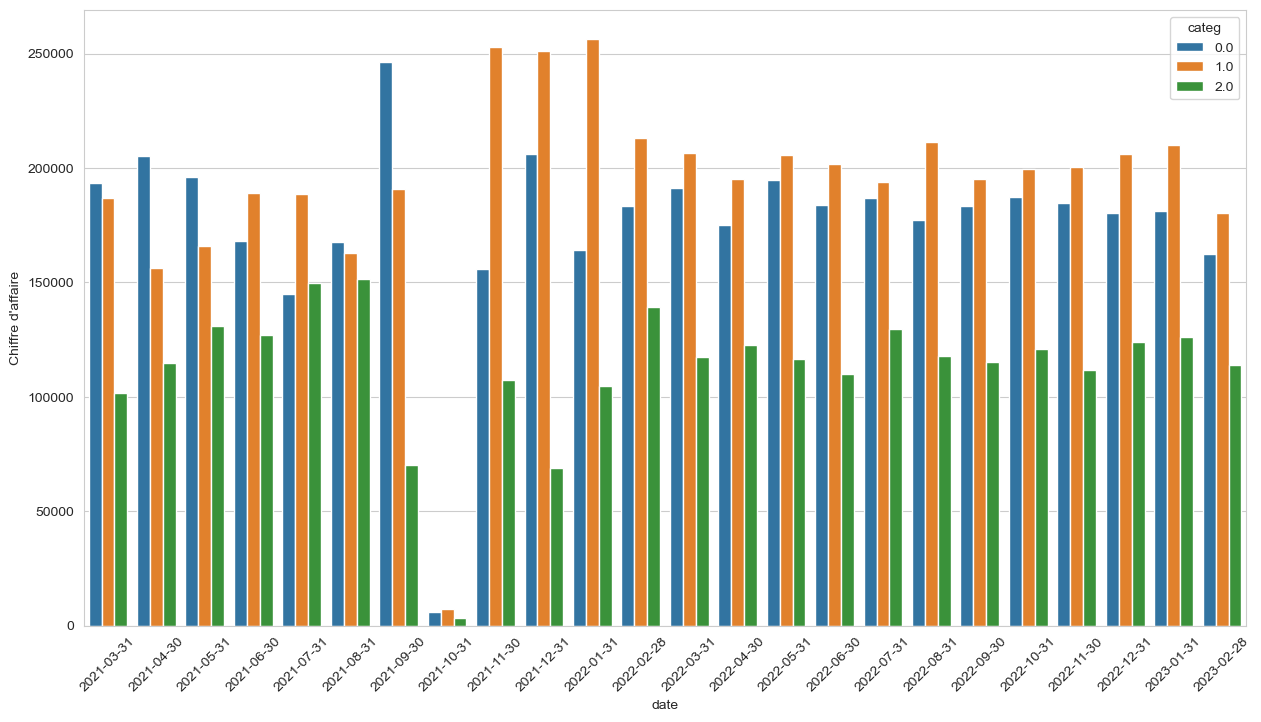

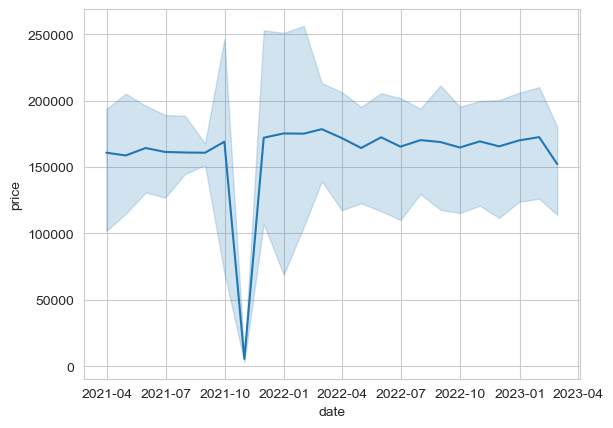

          date  categ      price
0   2021-03-31    0.0  193629.17
1   2021-03-31    1.0  186974.17
2   2021-03-31    2.0  101837.27
3   2021-04-30    0.0  205222.46
4   2021-04-30    1.0  156138.35
..         ...    ...        ...
67  2023-01-31    1.0  210104.41
68  2023-01-31    2.0  126153.08
69  2023-02-28    0.0  162457.00
70  2023-02-28    1.0  180347.24
71  2023-02-28    2.0  113875.52

[72 rows x 3 columns]


In [469]:
plt.figure(figsize=(15,8))
chiffreAffaireCategorie = chiffreAffaire.groupby(by=[pd.Grouper(key='date', freq='M'), 'categ'])['price'].sum().unstack(fill_value=0).reset_index()
chiffreAffaireCategorie['date'] = pd.to_datetime(chiffreAffaireCategorie['date']).dt.date
chiffreAffaireCategorie[1.0] = chiffreAffaireCategorie[1.0] + chiffreAffaireCategorie[0.0]
chiffreAffaireCategorie[2.0] = chiffreAffaireCategorie[1.0] + chiffreAffaireCategorie[2.0]

Cat2 = sns.barplot(x = 'date', y = 2.0, data = chiffreAffaireCategorie, color = 'limegreen')
Cat1 = sns.barplot(x = 'date', y = 1.0, data = chiffreAffaireCategorie, color = 'coral')
Cat0 = sns.barplot(x = 'date', y = 0.0, data = chiffreAffaireCategorie, color = 'slateblue')

plt.ylabel('Chiffre d\'affaire')
plt.xticks(rotation=45)


chiffreAffaireCategorie = chiffreAffaire.copy(deep=True)

plt.figure(figsize=(15,8))
chiffreAffaireCategorie = chiffreAffaireCategorie.groupby(by=[pd.Grouper(key='date', freq='M'), 'categ'])['price'].sum().reset_index()#.unstack(fill_value=0)##
chiffreAffaireCategorie['date'] = pd.to_datetime(chiffreAffaireCategorie['date']).dt.date

sns.barplot(data=chiffreAffaireCategorie,x='date',y='price',hue='categ')
plt.xticks(rotation=45)
plt.ylabel('Chiffre d\'affaire')
plt.show()

sns.lineplot(data=chiffreAffaireCategorie,x='date',y='price')
#chiffreAffaireCategorie.plot.bar(stacked=True, x='date')
plt.show()
print(chiffreAffaireCategorie)



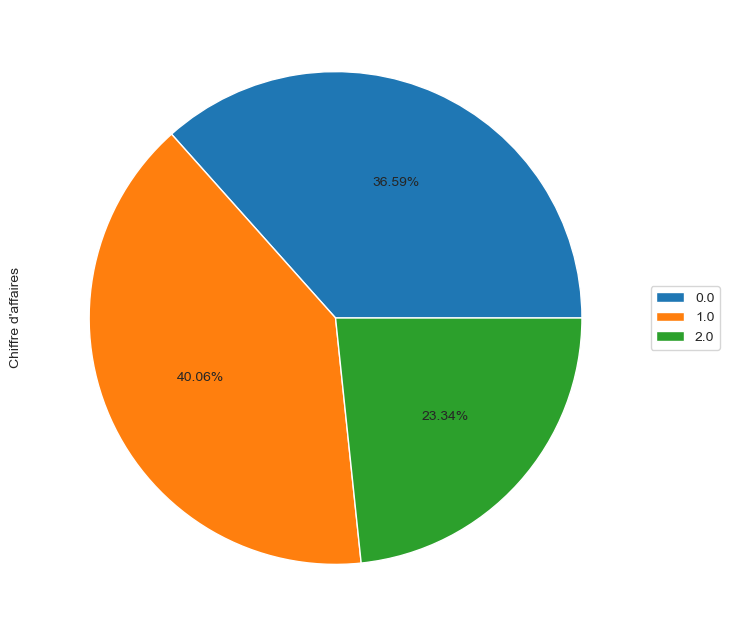

In [470]:

chiffreAffaireCategorie = chiffreAffaire.groupby(by='categ')['price'].sum().rename("Chiffre d'affaires")
chiffreAffaireCategorie.plot.pie(autopct=lambda diapo: str(round(diapo, 2)) + '%',labeldistance=None,figsize=(8,8),title=None).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# Répartition des clients

# Courbe de Lorenz

In [471]:
def lorenz(variable, title):
    X = variable.values
    X = np.sort(X)

    # Indice de Gini
    def gini(array):
        sorted_array = array.copy()
        sorted_array.sort()
        n = array.size
        coef_ = 2. / n
        const_ = (n + 1.) / n
        weighted_sum = sum([(i + 1) * yi for i, yi in enumerate(sorted_array)])
        return coef_ * weighted_sum / (sorted_array.sum()) - const_

    print('Incide de Gini :', gini(X))

    # Courbe de Lorenz
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    # X_lorenz[0], X_lorenz[-1]
    y = np.arange(X_lorenz.size) / (X_lorenz.size - 1)
    lorenz = pd.DataFrame()
    lorenz['X'] = pd.Series(X_lorenz)
    lorenz['Y'] = pd.Series(y)
    sns.scatterplot(data=lorenz, x='Y', y='X', marker='x')

    # Diagonale
    a = np.arange(0, 1, .01)
    x = a
    y = a

    # Graphique
    sns.lineplot(x=x, y=y)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()

Incide de Gini : 0.4471794388153374


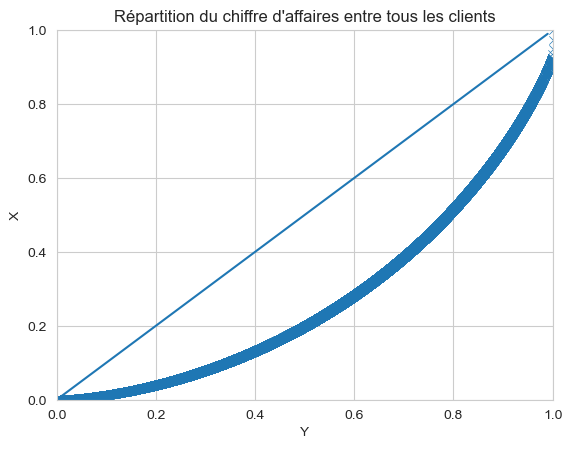

In [472]:

# ----------------------------------------------------------------------------------------------------------------------
# Courbe de Lorenz -----------------------------------------------------------------------------------------------------

chiffreAffaireClient = tableTotale.groupby('client_id')['price'].sum().rename('chiffre d\'affaire').sort_values()

lorenz(chiffreAffaireClient, 'Répartition du chiffre d\'affaires entre tous les clients')

# Corrélation entre les caractéristiques

<AxesSubplot:>

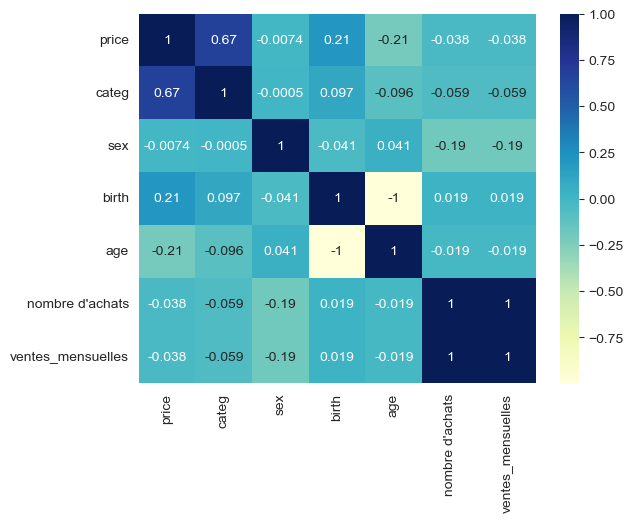

In [473]:
#Lien entre données
sns.heatmap(tableTotale.replace({"m": 0,"f": 1}).corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 1000x1000 with 0 Axes>

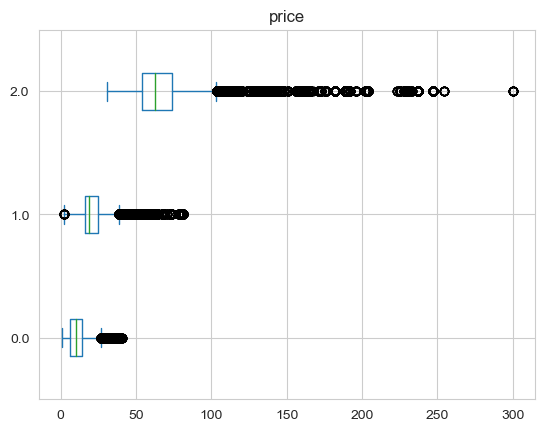

In [474]:
#Prix/catégorie
plt.figure(figsize=(10,10))
chiffreAffaire.plot.box(column="price", by="categ", vert=False, showfliers=True)

price    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

<Figure size 1000x1000 with 0 Axes>

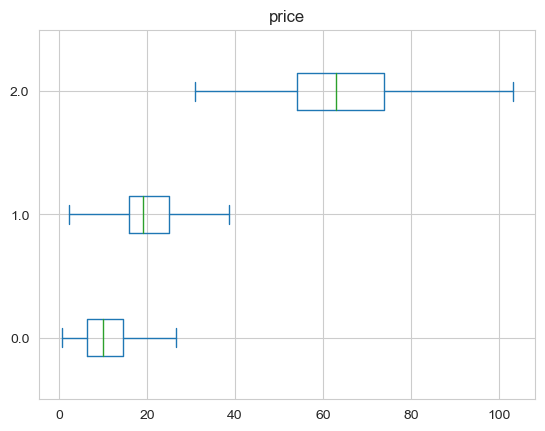

In [475]:
#Prix/catégorie
plt.figure(figsize=(10,10))
chiffreAffaire.plot.box(column="price", by="categ", vert=False, showfliers=False)

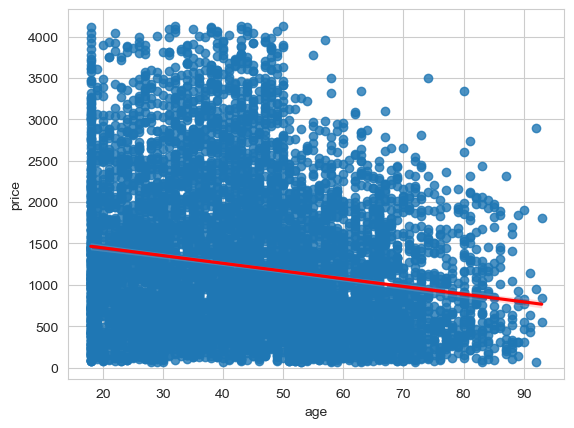

In [476]:
# ----------------------------------------------------------------------------------------------------------------------
# Lien entre age et montant des achats ---------------------------------------------------------------------------------

ageMontant = tableTotale[['client_id', 'birth', 'price', 'sex']].groupby(by=['client_id', 'birth', 'sex'], as_index=False)['price'].sum()
ageMontant['age'] = 2022 - ageMontant['birth']
ageMontant = ageMontant[ageMontant.price.between(ageMontant.price.quantile(.01), ageMontant.price.quantile(.99))]
sns.regplot(x="age", y="price", data=ageMontant, line_kws={'color': 'red'})
plt.show()

# Prix en fonction de l'age

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Prix moyen du livre acheté')]

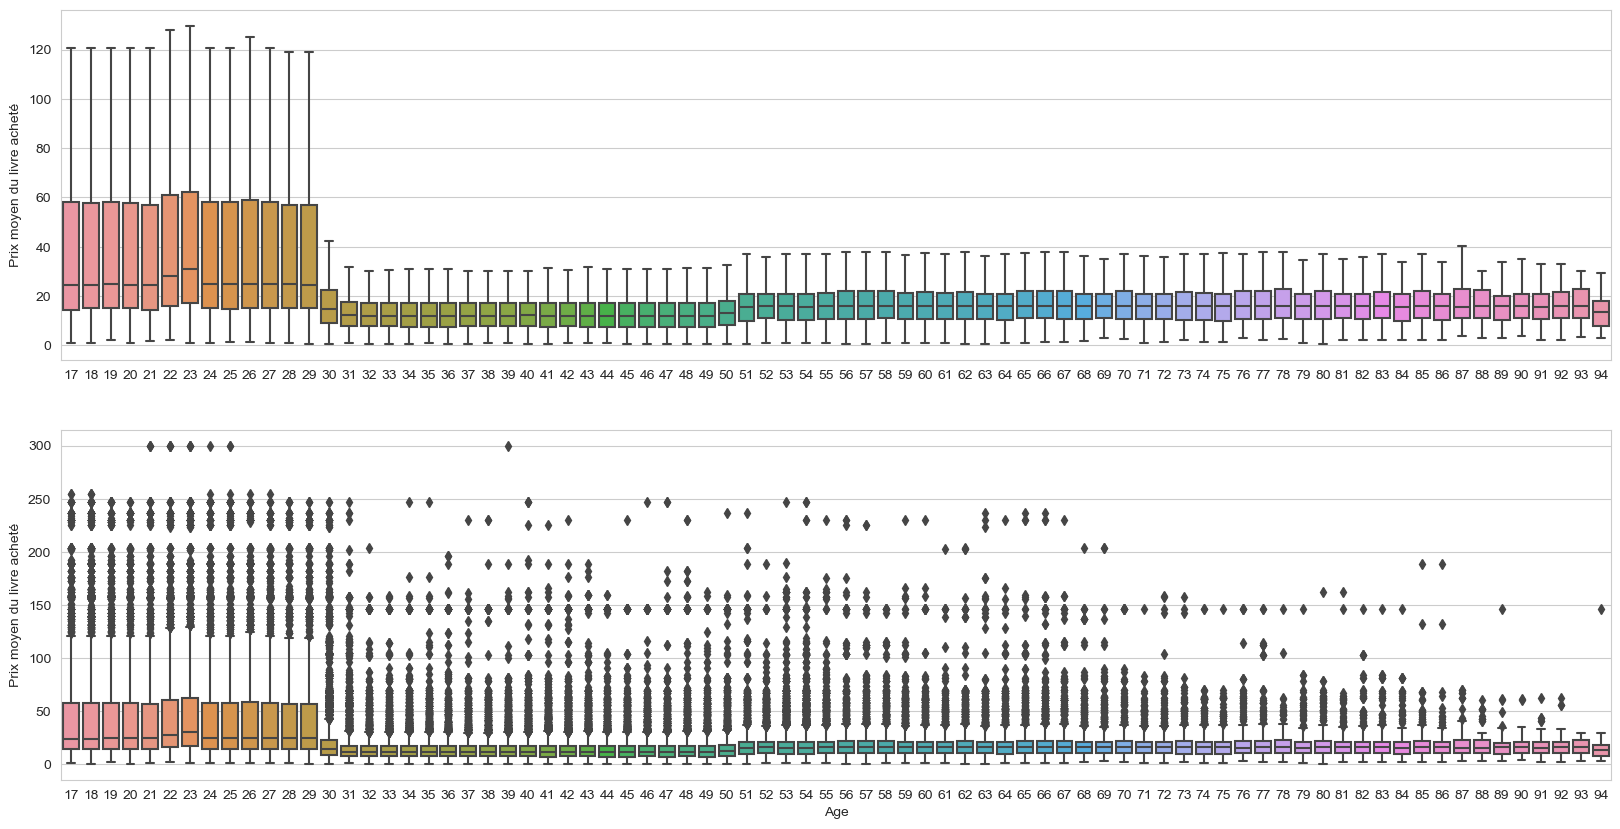

In [477]:
f, (ax_box1, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.5, .5)},  figsize=(20,10))

sns.boxplot(data=tableTotale, x='age',y='price',ax=ax_box1, showfliers=False)
sns.boxplot(data=tableTotale, x='age',y='price',ax=ax_box)

ax_box1.set(xlabel='',ylabel='Prix moyen du livre acheté')
ax_box.set(xlabel='Age',ylabel='Prix moyen du livre acheté')

[Text(0.5, 0, "Tranche d'age"), Text(0, 0.5, 'Prix moyen du livre acheté')]

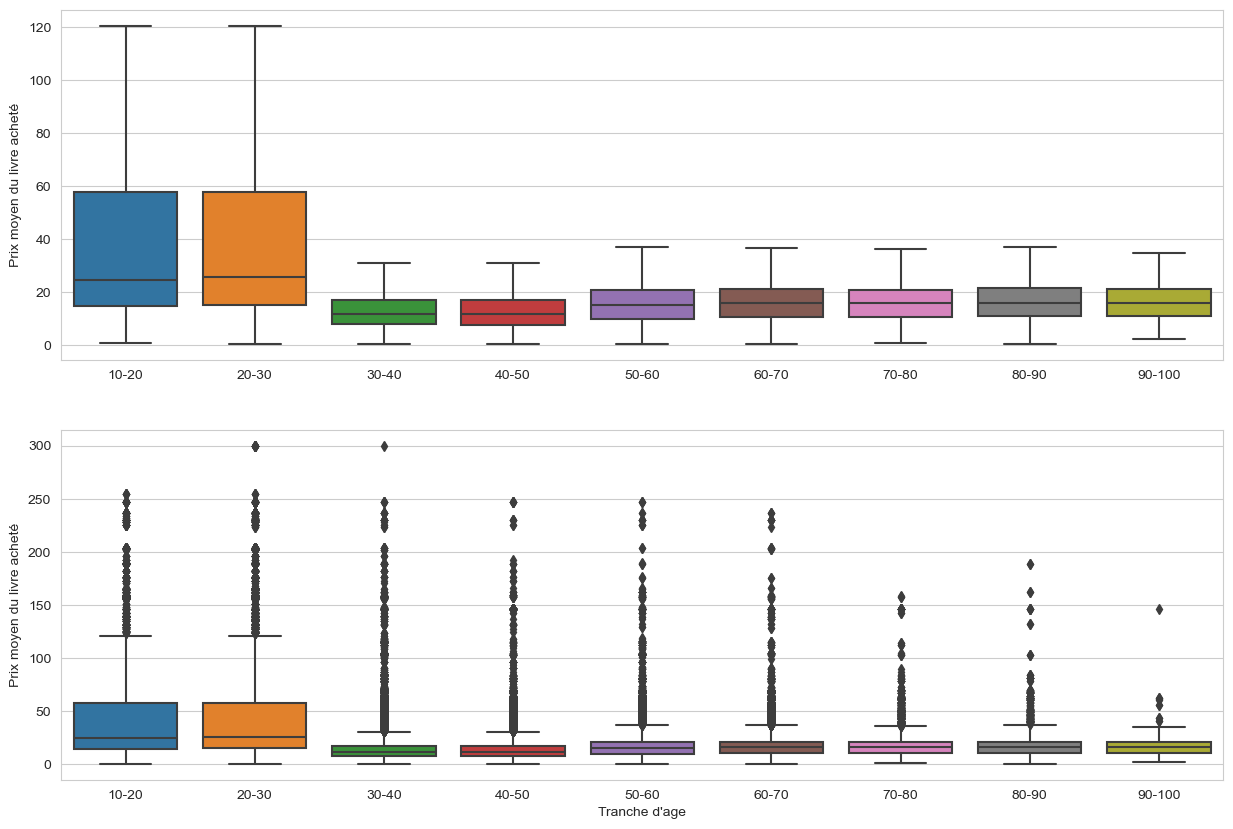

In [478]:
f, (ax_box1, ax_box) = plt.subplots(2, sharex=False, gridspec_kw={"height_ratios": (.5, .5)},  figsize=(15,10))

sns.boxplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge',y='price',ax=ax_box1, showfliers=False)
sns.boxplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge',y='price',ax=ax_box)

ax_box1.set(xlabel='',ylabel='Prix moyen du livre acheté')
ax_box.set(xlabel='Tranche d\'age',ylabel='Prix moyen du livre acheté')



# Lien entre age et catégorie

<AxesSubplot:xlabel='age', ylabel='Count'>

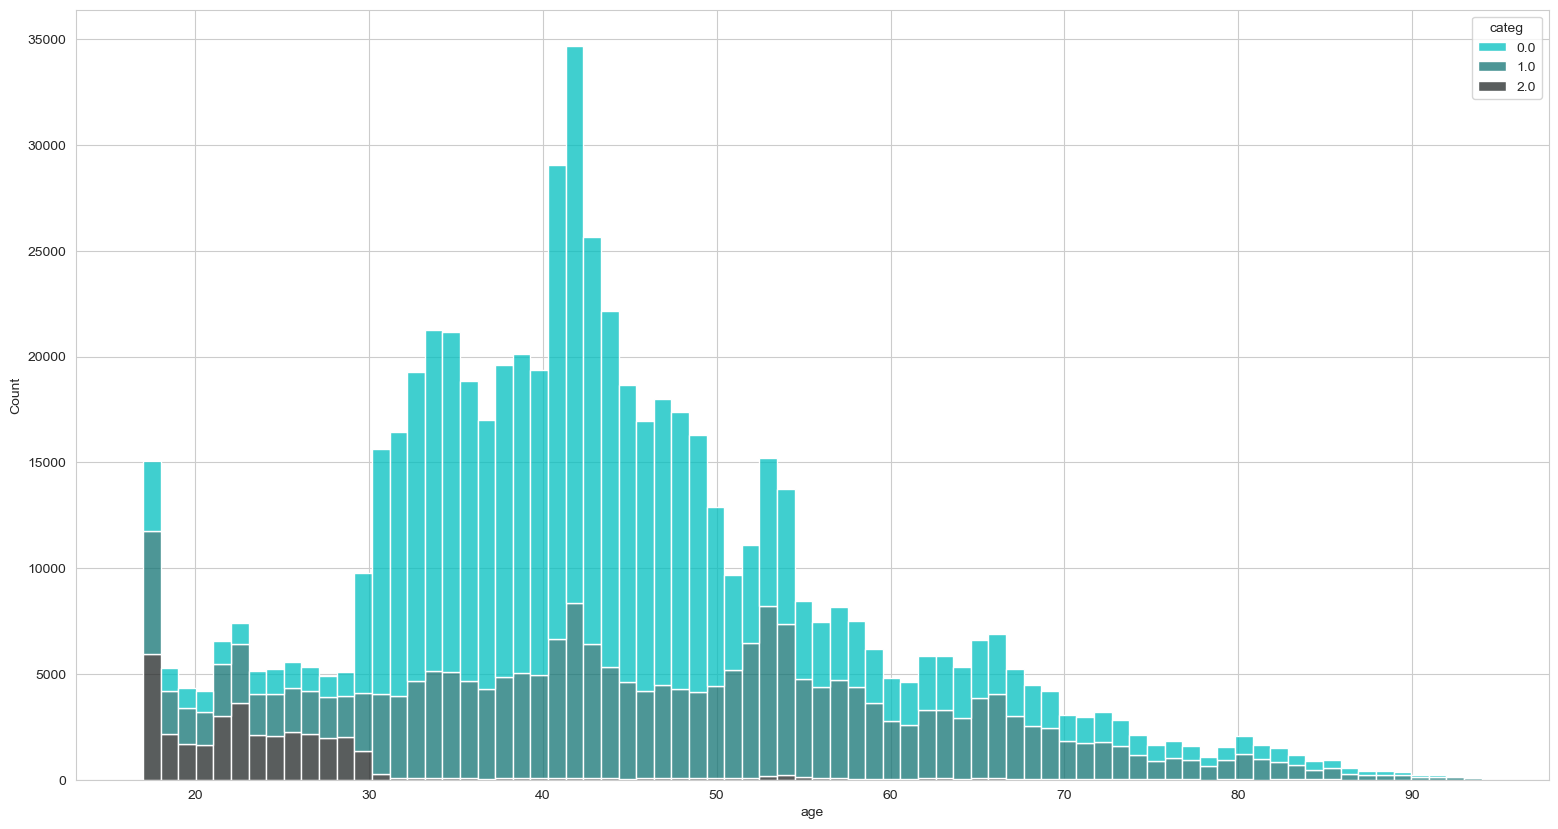

In [479]:
plt.figure(figsize=(19,10))
sns.histplot(data=tableTotale.sort_values(by='age'), x='age', hue='categ',bins=93-17,palette="dark:c_r",multiple='stack')

<AxesSubplot:xlabel='trancheAge', ylabel='Count'>

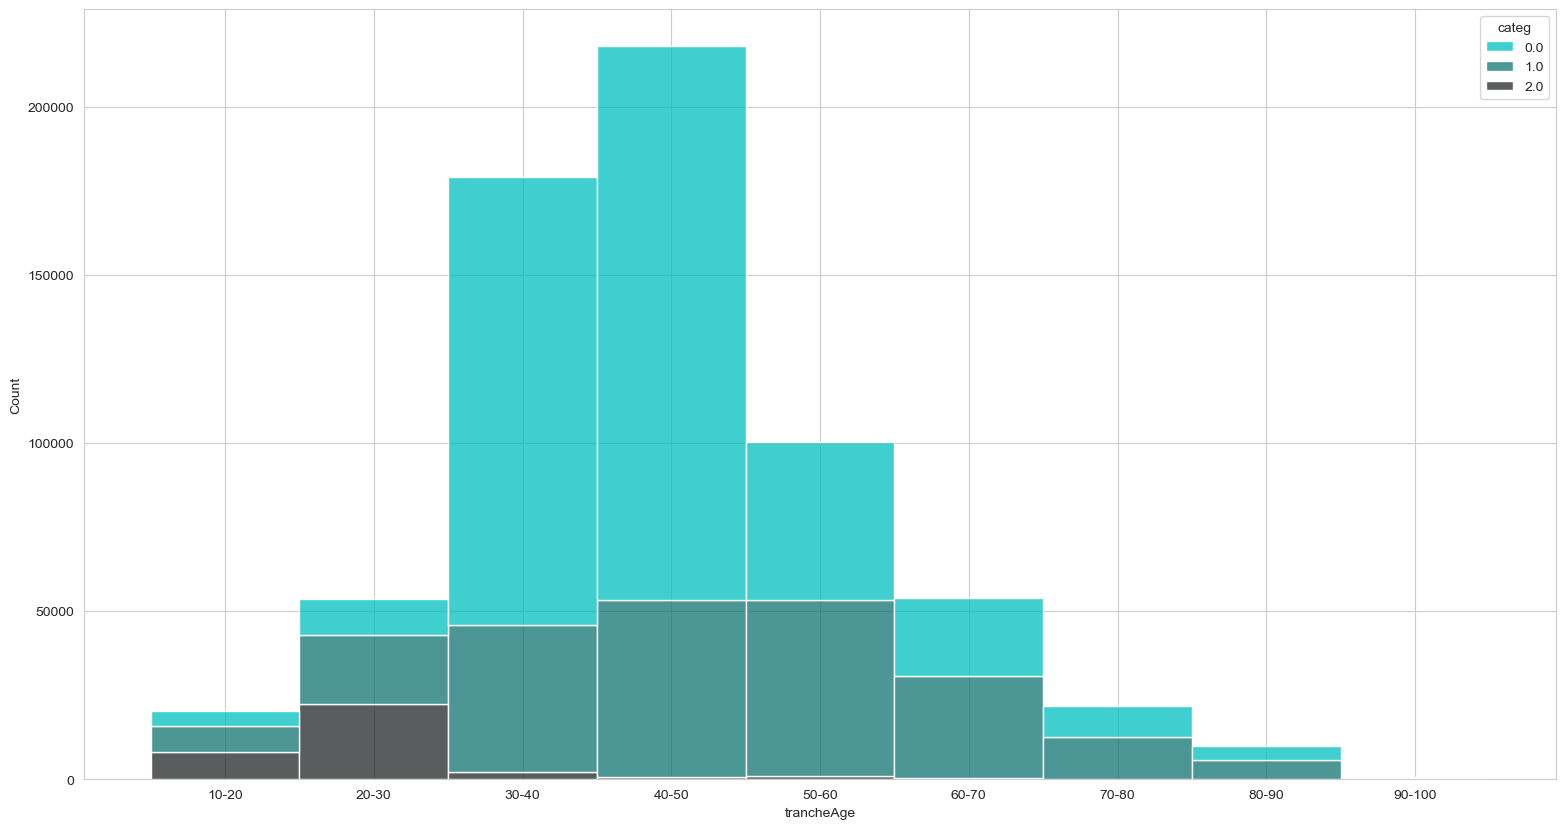

In [480]:
plt.figure(figsize=(19,10))
sns.histplot(data=tableTotale.sort_values(by='trancheAge'), x='trancheAge', hue='categ',palette="dark:c_r",multiple='stack')

# Lien entre catégorie et genre

<AxesSubplot:xlabel='sex', ylabel='Count'>

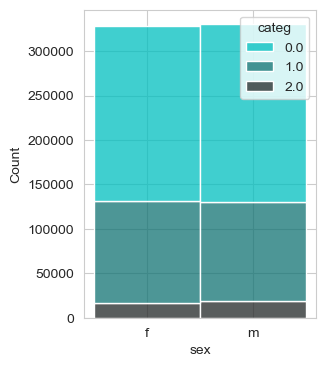

In [481]:
plt.figure(figsize=(3,4))
sns.histplot(data=tableTotale.sort_values(by='trancheAge'), x='sex', hue='categ',palette="dark:c_r",multiple='stack')